In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("consumption_temp.csv")
df['time'] = pd.to_datetime(df['time'])

df.describe()

,time,consumption,temperature
count,49494,49494.000000,49494.000000
mean,2022-10-11 02:25:46.223784704,3.509242,6.554019
min,2022-04-07 21:00:00,0.000000,-17.299999
25%,2022-07-19 03:00:00,1.263256,1.000000
50%,2022-10-13 01:00:00,2.376530,6.800000
75%,2023-01-06 23:00:00,5.189000,12.100000
max,2023-04-02 21:00:00,18.045011,30.500000
std,NaN,3.096356,7.630308


In [3]:
import pandas as pd
import numpy as np

df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['month'] = df['time'].dt.month

df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

In [8]:
def plot_corr_heatmap(df):
    

    corr = df.corr()


    mask = np.triu(np.ones_like(corr, dtype=bool))

    plt.figure(figsize=(15, 10))

    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
    plt.title(f'Correlation Heatmap')
    plt.show()

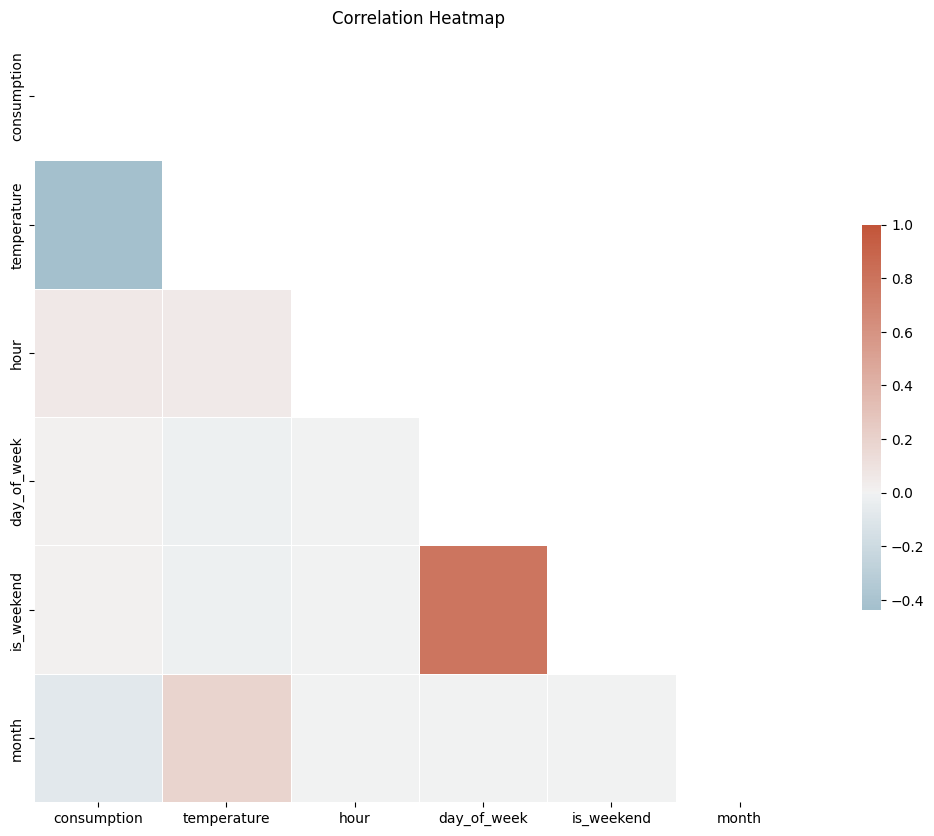

In [9]:
plot_corr_heatmap(df.drop(columns=['location']))

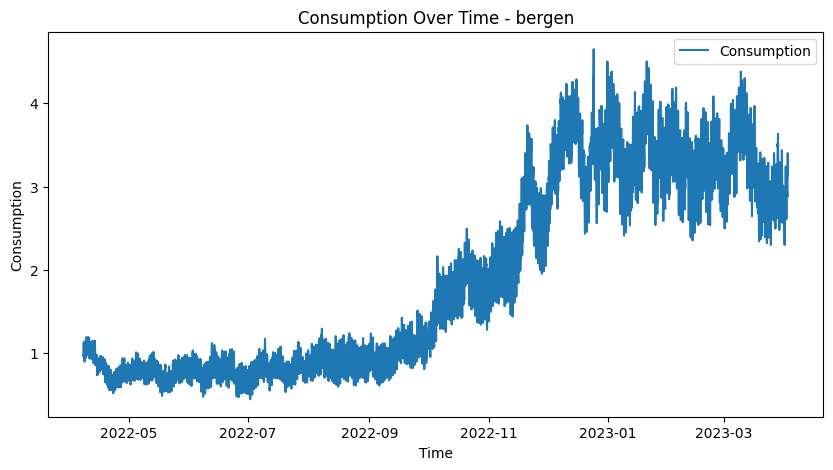

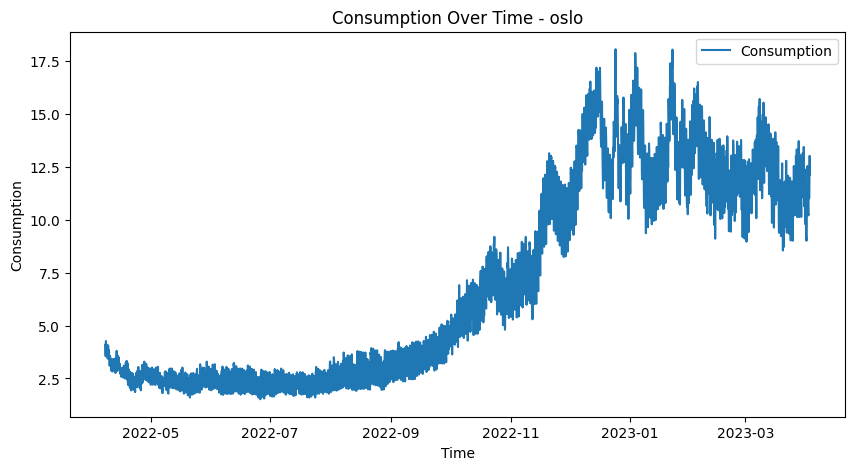

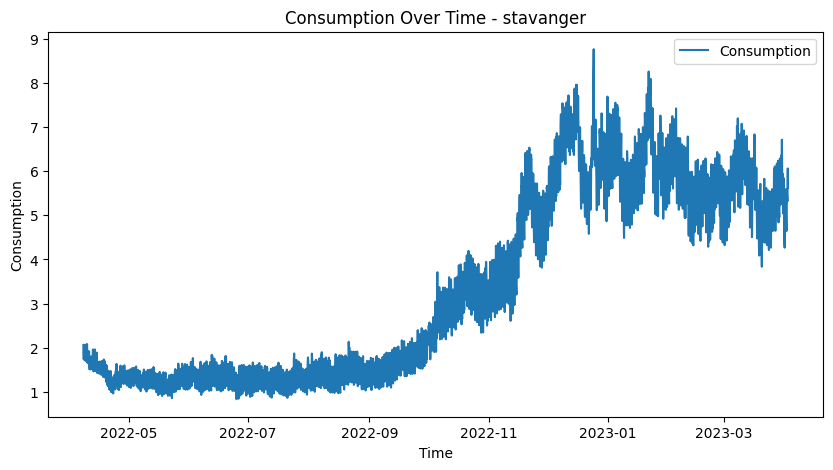

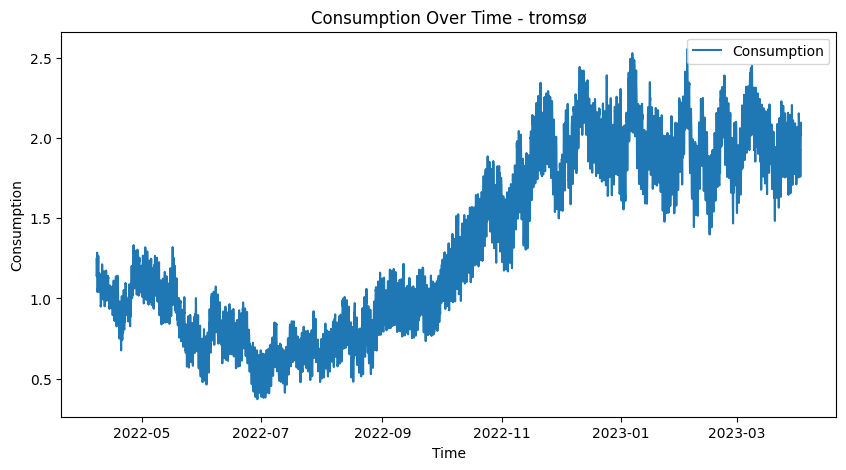

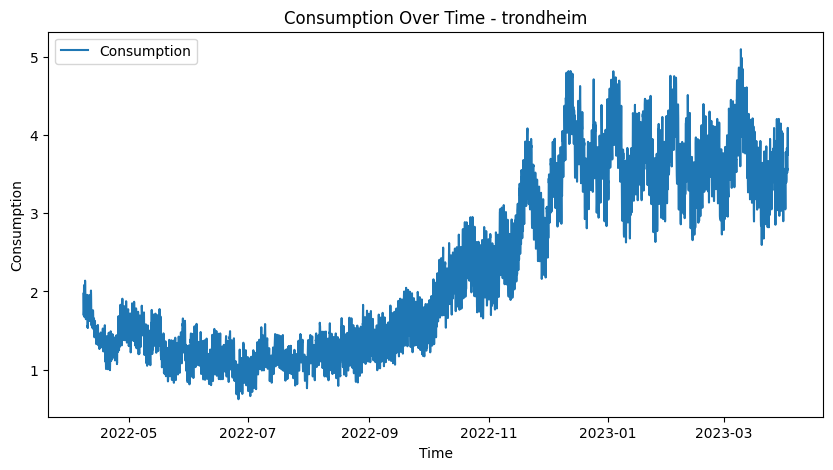

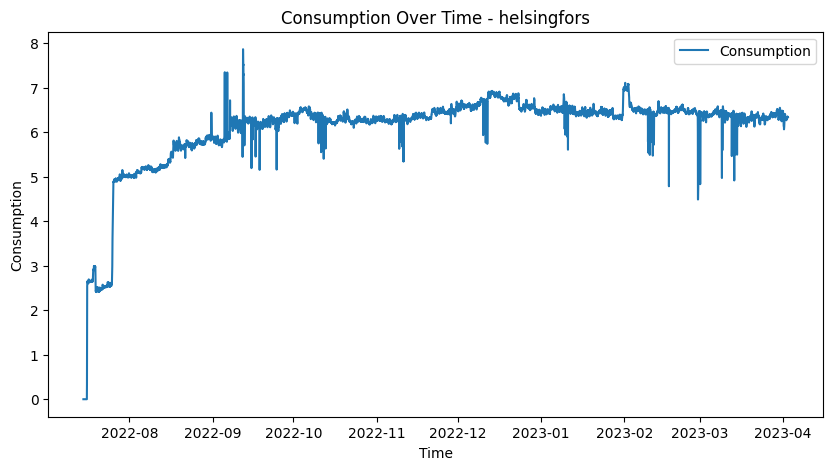

In [10]:
locations = df['location'].unique()

for location in locations:
    subset = df[df['location'] == location]
    
    plt.figure(figsize=(10,5))
    plt.plot(subset.index, subset['consumption'], label='Consumption')
    plt.title(f'Consumption Over Time - {location}')
    plt.xlabel('Time')
    plt.ylabel('Consumption')
    plt.legend()
    plt.show()


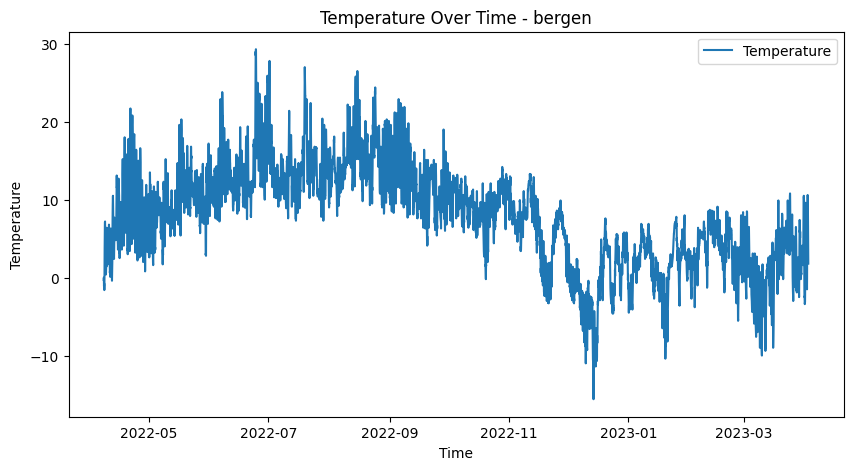

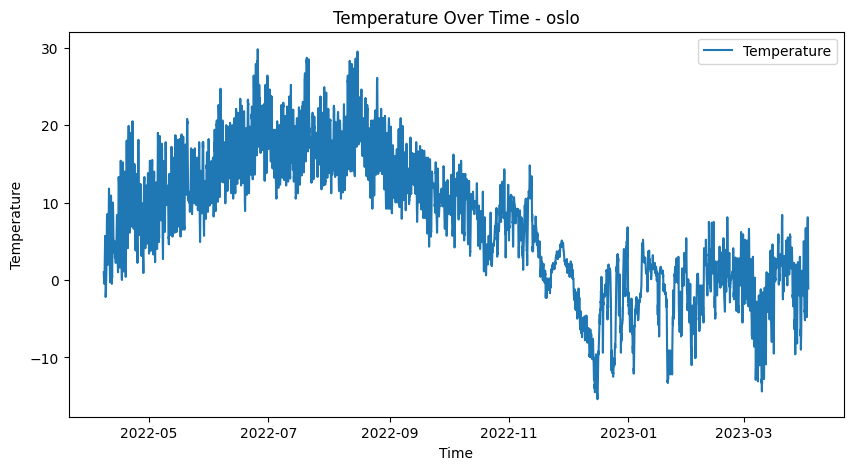

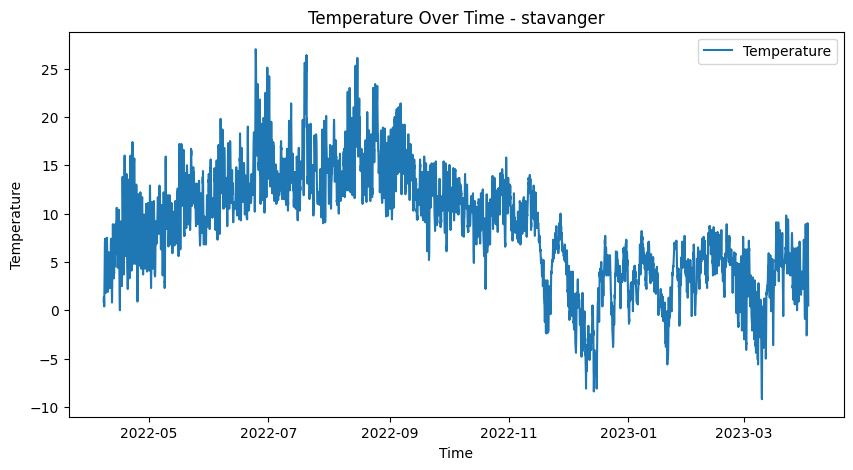

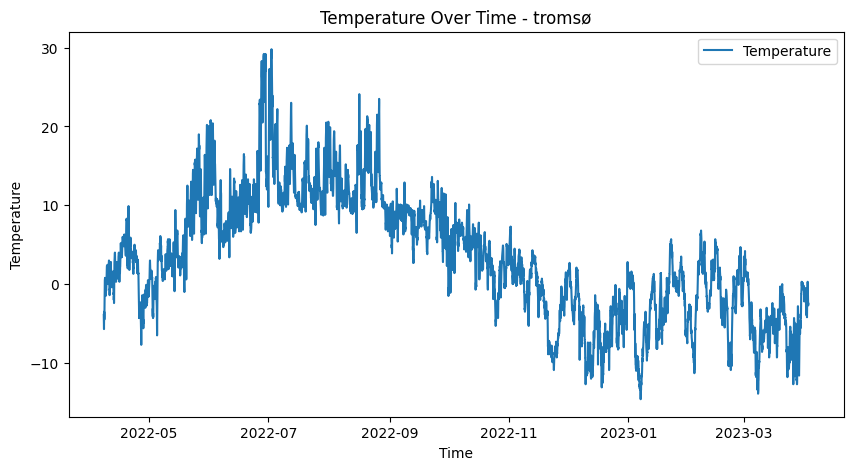

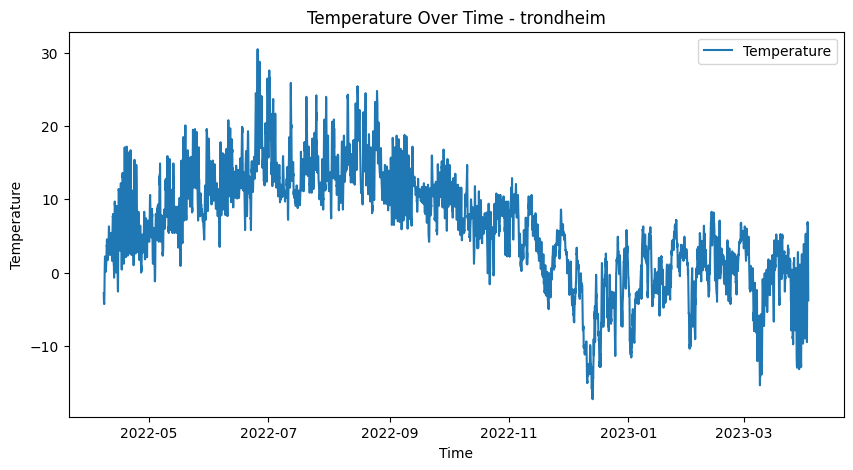

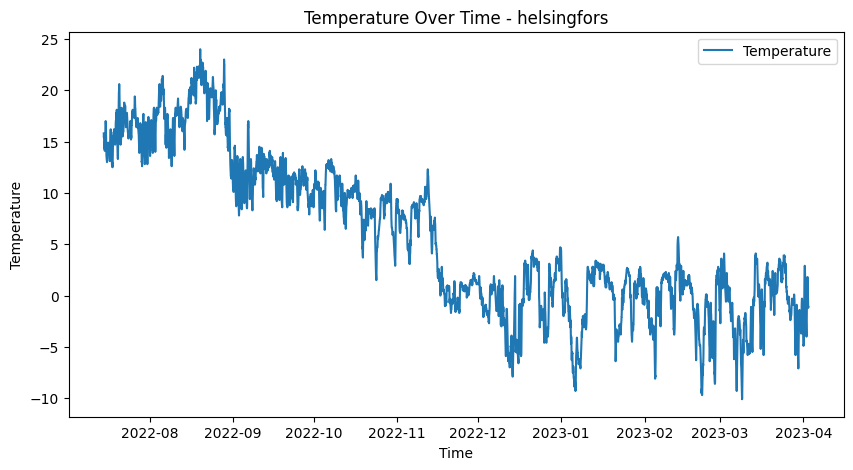

In [12]:
locations = df['location'].unique()

for location in locations:
    subset = df[df['location'] == location]
    
    plt.figure(figsize=(10,5))
    plt.plot(subset.index, subset['temperature'], label='Temperature')
    plt.title(f'Temperature Over Time - {location}')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()


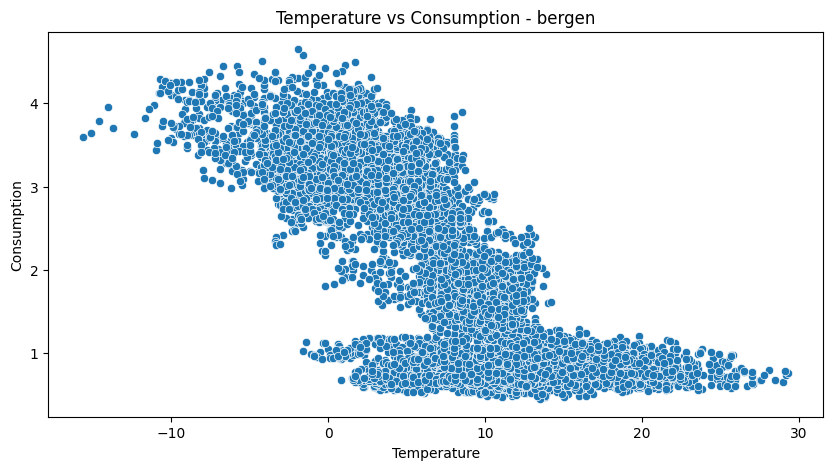

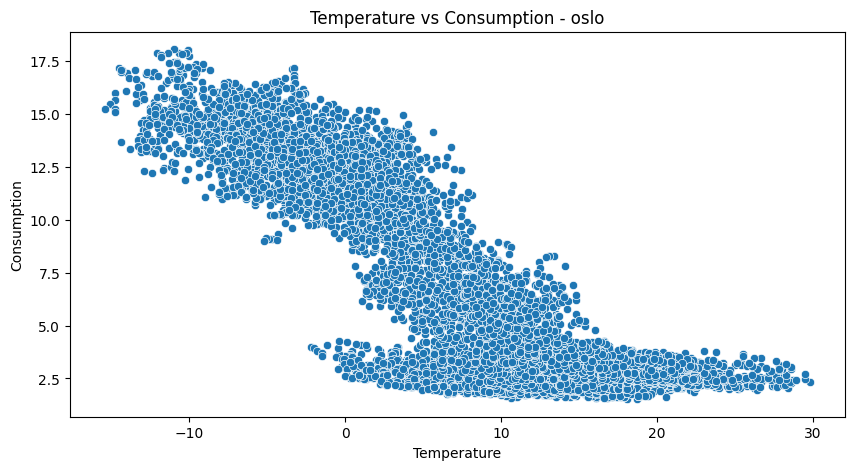

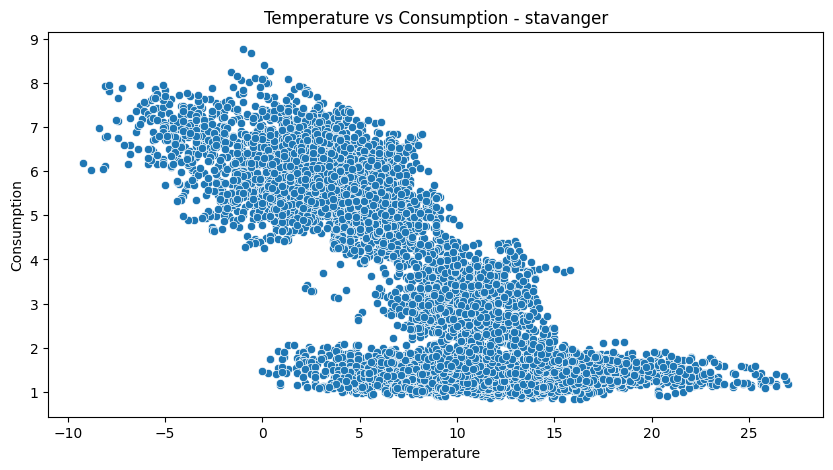

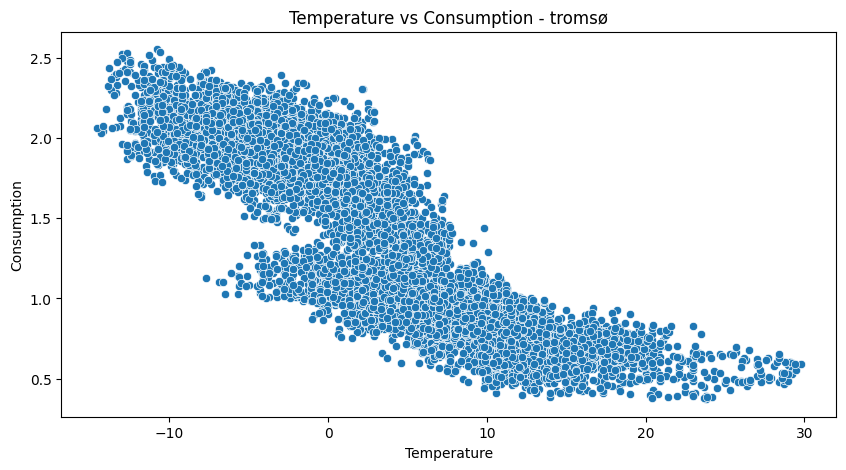

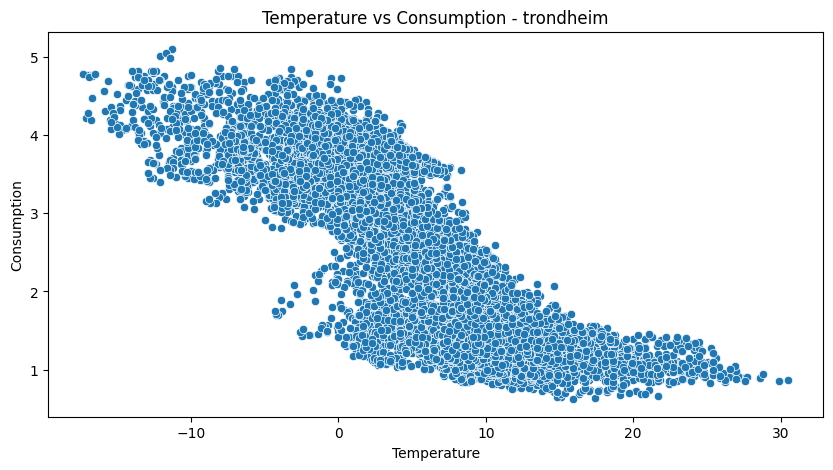

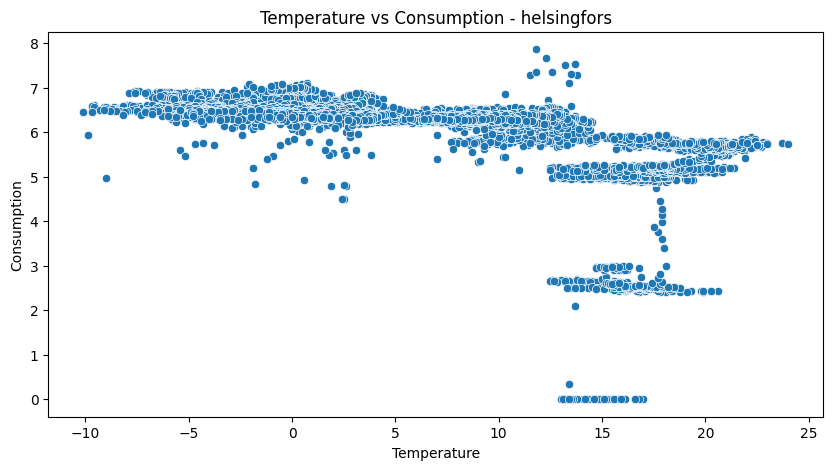

In [13]:
locations = df['location'].unique()

for location in locations:
    subset = df[df['location'] == location]
    
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=subset['temperature'], y=subset['consumption'])
    plt.title(f'Temperature vs Consumption - {location}')
    plt.xlabel('Temperature')
    plt.ylabel('Consumption')
    plt.show()
